In [1]:
import numpy as np
import pandas as pd

In [2]:
x1_1 = np.random.uniform(2,7,15)
x1_2 = np.random.uniform(0,2,7)
x1_3 = np.random.uniform(7,9,8)
x1 = np.append(x1_1,x1_2)
x1 = np.append(x1 , x1_3)

x2_1 = np.random.uniform(4,6,15)
x2_2 = np.random.uniform(1,3,7)
x2_3 = np.random.uniform(6,8,8)
x2 = np.append(x2_1,x2_2)
x2 = np.append(x2 , x2_3)

In [3]:
df = pd.DataFrame()

In [4]:
df['x1'], df['x2'] = x1 , x2

In [5]:
y = np.append(np.ones((15,),dtype=int),np.zeros((15,),dtype=int))

In [6]:
df['y'] = y

In [7]:
df.head()

,x1,x2,y
0,4.059157,4.328952,1
1,4.258212,5.256986,1
2,5.521123,5.578398,1
3,2.842610,4.444224,1
4,3.536398,5.513144,1


In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle
%matplotlib inline
import seaborn as sns

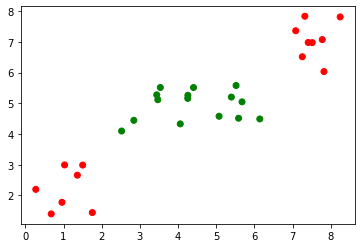

In [9]:
color= ['red' if l == 0 else 'green' for l in df['y']]
plt.scatter(df['x1'], df['x2'], color=color)

<h3> Function to find most specific Hypothesis in case of Rectangle

<function matplotlib.pyplot.show(close=None, block=None)>

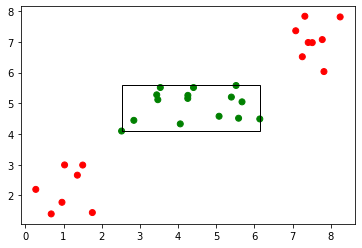

In [10]:

def find_S():
    y_1 = df[df['y'] == 1]
    min_x = min(y_1['x1'])
    min_y = min(y_1['x2'])
    max_x = max(y_1['x1'])
    max_y = max(y_1['x2'])
    return [min_x,min_y,max_x,max_y]

min_x , min_y , max_x , max_y = find_S() 

plt.figure()
currentAxis = plt.gca()
plt.scatter(df['x1'], df['x2'], color=color)
ax = plt.gca()
ax.add_patch(Rectangle((min_x, min_y), max_x-min_x, max_y-min_y,
                      alpha=1, fill=None))
plt.show

<h3> Function to find most General Hypothesis in case of Rectangle

<function matplotlib.pyplot.show(close=None, block=None)>

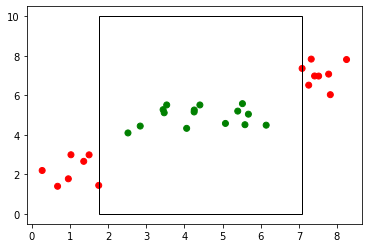

In [11]:

def find_G():
    y_0 = df[df['y'] == 0]
    x_lessThan_xmin = [x for x in y_0['x1'] if x <= min_x]
    x_greaterThan_xmax = [x for x in y_0['x1'] if x >= max_x]
    return max(x_lessThan_xmin), min(x_greaterThan_xmax)

min_x_G, max_x_G = find_G()

plt.figure()
currentAxis = plt.gca()
plt.scatter(df['x1'], df['x2'], color=color)
ax = plt.gca()
ax.add_patch(Rectangle((min_x_G, 0), max_x_G-min_x_G, 10,
                      alpha=1, fill=None))
plt.show

<h3> Function to find most specific Hypothesis in case of Circle

In [12]:

def findCircleParameter():
    y_1 = df[df['y'] == 1]
    center_x = np.mean(y_1['x1'])
    center_y = np.mean(y_1['x2'])
    center = (center_x,center_y)
    center = np.array(center)
    farthest_point = (y_1['x1'][0],y_1['x2'][0])
    radius = 0
    for x,y in zip(y_1['x1'],y_1['x2']):
        point = np.array((x,y))
        dist = np.linalg.norm(point-center)
        if dist>radius:
            radius = dist
    return center , radius

<function matplotlib.pyplot.show(close=None, block=None)>

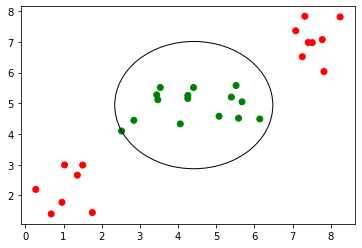

In [13]:
center, radius = findCircleParameter()

plt.figure()
currentAxis = plt.gca()
plt.scatter(df['x1'], df['x2'], color=color)
ax = plt.gca()
ax.add_patch(Circle(center, radius=radius,
                      alpha=1, fill=None))
plt.show

<h3> Function to find most General Hypothesis in case of Circle

<function matplotlib.pyplot.show(close=None, block=None)>

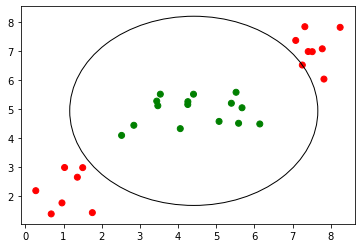

In [14]:
def findCircleParameter():
    y_1 = df[df['y'] == 1]
    y_0 = df[df['y'] == 0]
    center_x = np.mean(y_1['x1'])
    center_y = np.mean(y_1['x2'])
    center = (center_x,center_y)
    center = np.array(center)
    closest_point = (y_0['x1'][15],y_0['x2'][16])
    radius = np.inf
    for x,y in zip(y_0['x1'],y_0['x2']):
        point = np.array((x,y))
        dist = np.linalg.norm(point-center)
        if dist<radius:
            radius = dist
    return center , radius

center, radius = findCircleParameter()

plt.figure()
currentAxis = plt.gca()
plt.scatter(df['x1'], df['x2'], color=color)
ax = plt.gca()
ax.add_patch(Circle(center, radius=radius,
                      alpha=1, fill=None))
plt.show